# SPAM Classifier using NLTK 

In [1]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt 

### Loading Dataset

In [5]:
data = pd.read_csv('spam.csv',encoding="ISO-8859-1")
data.head()

FileNotFoundError: ignored

### Data Preprocessing

In [ ]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.rename(columns={"v1":"target","v2":"sms"},inplace=True)
df=data.copy()
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

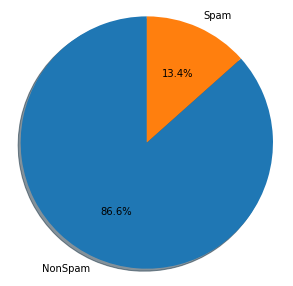

In [ ]:
fig = plt.figure(figsize=(5, 5))

labels = 'NonSpam', 'Spam'

sizes = [df.target.value_counts().ham, df.target.value_counts().spam]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

plt.axis('equal')

plt.show()

### Tokenization and Stemmeing

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
stopwords_eng = stopwords.words('english')
print(stopwords_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
corpus = []

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',data['sms'][i])
    review = review.split()
    # review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

### Lemmatizing

In [ ]:
corpus = []

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',data['sms'][i])
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry wkly comp win FA Cup final tkts st May Text FA receive entry question std txt rate T C apply',
 'U dun say early hor U c already say',
 'Nah I think go usf life around though',
 'FreeMsg Hey darling week word back I like fun still Tb ok XxX std chgs send rcv',
 'Even brother like speak They treat like aid patent',
 'As per request Melle Melle Oru Minnaminunginte Nurungu Vettam set callertune Callers Press copy friend Callertune',
 'WINNER As valued network customer selected receivea prize reward To claim call Claim code KL Valid hour',
 'Had mobile month U R entitled Update latest colour mobile camera Free Call The Mobile Update Co FREE',
 'I gonna home soon want talk stuff anymore tonight k I cried enough today',
 'SIX chance win CASH From pound txt CSH send Cost p day day TsandCs apply Reply HL info',
 'URGENT You week FREE membership Prize Jackpot Txt word 